# PLN (Procesamiento del lenguaje natural) con Python - Recetas
  
**Requisitos: Será necesario instalar la librería NLTK, además de descargar el corpus para las stopwords. Por defecto Conda incluye el paquete NLTK así como Google Colab.  En el caso de que no estuviera instalado NLTK, ejecutar el siguiente chunk**

In [1]:
# Ejecutar este chunk sólo si no está instalado NLTK
# Descomentar la siguiente línea para instalar la libraría:

#!conda install nltk 

In [1]:
import nltk

In [3]:
# nltk.download_shell() 
# #d) DOwnload:
# #stopwords

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


## 1.Descarga de un corpus externo
Descargaremos el set de datos de películas Cornell CS Movie.  Incluye valoraciones positivas y negativas de diferentes películas.  Los datos pueden descargarse desde:
http://www.cs.cornell.edu/people/pabo/movie-review-data/mix20_rand700_tokens_cleaned.zip

In [2]:
from nltk.corpus import CategorizedPlaintextCorpusReader

El corpus ya está categorizado por múltiples ficheros de texto con revisiones positivas y negativas), por eso usamos **CategorizedPlaintextCorpusReader** en este caso.  Más adelante trabajaremos con datos que no lo están. La clase CategorizedPlainCorpusReader, nos permite cargar los datos manteniendo la categorización.

In [26]:
reader = CategorizedPlaintextCorpusReader(
    r'//Users/egoitzaulestiapadilla/01_CODE/___AI-BIG-DATA___/04-Sistemas-de-Aprendizaje-Automatico/04-NLP/NLP-Python/mix20_rand700_tokens_cleaned',
    r'.*\.txt',
    cat_pattern=r'tokens/([^/]+)/.*',
    encoding='cp1252'
)


In [27]:
print(reader.categories())
print(reader.fileids()[1:50])

['neg', 'pos']
['tokens/neg/cv001_tok-19324.txt', 'tokens/neg/cv002_tok-3321.txt', 'tokens/neg/cv003_tok-13044.txt', 'tokens/neg/cv004_tok-25944.txt', 'tokens/neg/cv005_tok-24602.txt', 'tokens/neg/cv006_tok-29539.txt', 'tokens/neg/cv007_tok-11669.txt', 'tokens/neg/cv008_tok-11555.txt', 'tokens/neg/cv009_tok-19587.txt', 'tokens/neg/cv010_tok-2188.txt', 'tokens/neg/cv011_tok-7845.txt', 'tokens/neg/cv012_tok-26965.txt', 'tokens/neg/cv013_tok-14854.txt', 'tokens/neg/cv014_tok-12391.txt', 'tokens/neg/cv015_tok-23730.txt', 'tokens/neg/cv016_tok-16970.txt', 'tokens/neg/cv017_tok-27221.txt', 'tokens/neg/cv018_tok-11502.txt', 'tokens/neg/cv019_tok-2003.txt', 'tokens/neg/cv020_tok-13096.txt', 'tokens/neg/cv021_tok-29141.txt', 'tokens/neg/cv022_tok-25633.txt', 'tokens/neg/cv023_tok-25625.txt', 'tokens/neg/cv024_tok-22867.txt', 'tokens/neg/cv025_tok-12991.txt', 'tokens/neg/cv026_tok-23590.txt', 'tokens/neg/cv027_tok-20123.txt', 'tokens/neg/cv028_tok-25883.txt', 'tokens/neg/cv029_tok-27815.txt', 't

In [23]:
print(reader.raw(reader.fileids()[0]))  # Reads the full content of the second file


tristar / 1 : 30 / 1997 / r ( language , violence , dennis rodman ) cast : jean-claude van damme ; mickey rourke ; dennis rodman ; natacha lindinger ; paul freeman director : tsui hark screenplay : dan jakoby ; paul mones ripe with explosions , mass death and really weird hairdos , tsui hark's " double team " must be the result of a tipsy hollywood power lunch that decided jean-claude van damme needs another notch on his bad movie-bedpost and nba superstar dennis rodman should have an acting career . actually , in " double team , " neither's performance is all that bad . i've always been the one critic to defend van damme -- he possesses a high charisma level that some genre stars ( namely steven seagal ) never aim for ; it's just that he's never made a movie so exuberantly witty since 1994's " timecop . " and rodman . . . well , he's pretty much rodman . he's extremely colorful , and therefore he pretty much fits his role to a t , even if the role is that of an ex-cia weapons expert .

In [17]:
reader.raw(reader.fileids()[0])

'tristar / 1 : 30 / 1997 / r ( language , violence , dennis rodman ) cast : jean-claude van damme ; mickey rourke ; dennis rodman ; natacha lindinger ; paul freeman director : tsui hark screenplay : dan jakoby ; paul mones ripe with explosions , mass death and really weird hairdos , tsui hark\'s " double team " must be the result of a tipsy hollywood power lunch that decided jean-claude van damme needs another notch on his bad movie-bedpost and nba superstar dennis rodman should have an acting career . actually , in " double team , " neither\'s performance is all that bad . i\'ve always been the one critic to defend van damme -- he possesses a high charisma level that some genre stars ( namely steven seagal ) never aim for ; it\'s just that he\'s never made a movie so exuberantly witty since 1994\'s " timecop . " and rodman . . . well , he\'s pretty much rodman . he\'s extremely colorful , and therefore he pretty much fits his role to a t , even if the role is that of an ex-cia weapons

In [19]:
print(reader.words(reader.fileids()[0]))  # Returns a list of words from the second file


['tristar', '/', '1', ':', '30', '/', '1997', '/', 'r', ...]


In [20]:
print(reader.categories())  # Returns a list of categories


['tokens']


Generamos los datos con revisión positiva y negativa

In [28]:
posFiles = reader.fileids(categories='pos')
negFiles = reader.fileids(categories='neg')

In [29]:
posFiles [1:10]

['tokens/pos/cv001_tok-10180.txt',
 'tokens/pos/cv002_tok-12931.txt',
 'tokens/pos/cv003_tok-8338.txt',
 'tokens/pos/cv004_tok-29856.txt',
 'tokens/pos/cv005_tok-26110.txt',
 'tokens/pos/cv006_tok-28887.txt',
 'tokens/pos/cv007_tok-14417.txt',
 'tokens/pos/cv008_tok-15650.txt',
 'tokens/pos/cv009_tok-6385.txt']

Vamos a extraer de manera aleatoria los nombres de 2 ficheroas (uno con revisión negativa y otro positiva).

In [30]:
from random import randint
fileP = posFiles[randint(0,len(posFiles)-1)]
fileN = negFiles[randint(0, len(posFiles) - 1)]
print(fileP)
print(fileN)

tokens/pos/cv448_tok-25113.txt
tokens/neg/cv520_tok-20758.txt


Imprimimos cada fichero...

In [31]:
for w in reader.words(fileP):
    print(w + ' ', end='')
    if (w is '.'):
        print()

directed by peter lord and nick park . 
screenplay by karey kirkpatrick , from a story by lord and park . 
starring julia sawalha , mel gibson , miranda richardson . 
running time : 84 minutes . 
rated g by the mfcb . 
reviewed on june 27th , 2000 . 
" chicken run " is the first full - length feature from nick park , creator of the popular " wallace and gromit " series of short films . 
like those movies , " chicken run " is done entirely in the claymation style of animation ( albeit far more advanced than those old rankin - bass christmas specials from the sixties that crop up on tv every december ) , and features a primarily british cast and setting . 
the result is a lovely family film , one which is sure to have tremendous appeal for the children while keeping the grown - ups quietly amused , as well . 
the tweedy chicken farm is home to hundreds of imprisoned chickens . 
some , like bunty ( imelda staunton ) , raf veteran fowler ( benjamin whitrow ) and dimwitted babs ( jane horro

<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/3_/bsh490990pv6w7gjtmjv6qy80000gn/T/ipykernel_2500/3888772881.py:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (w is '.'):


In [32]:
for w in reader.words(fileN):
    print(w + ' ', end='')
    if (w is '.'):
        print()

for more reviews and movie screensavers , visit http : // www . 
joblo . 
com / writer / director lawrence kasdan had a hand in penning some of the biggest film successes of the 1980s . 
yes , that ' s right , he co - wrote raiders of the lost ark ( 9 / 10 ) , the empire strikes back ( 8 . 
5 / 10 ) and return of the jedi ( 8 / 10 ) . 
now with this film , it looks as though he has decided to test his skills at mediocre screenwriting and bland directing . 
and guess what ? he succeeds once again ! plot : a man with a shady and regrettable past decides to run away and into a small american town , where he pretends to be a licensed psychologist to an open - armed swarm of people with problems . 
it isn ' t long before he befriends the small - town billionaire , folks become suspicious and he falls for one of his own patients . 
critique : this film is not a comedy ! it is a drama . 
i say this right up front because from the looks of the trailer , you would think that this film secures i

<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/3_/bsh490990pv6w7gjtmjv6qy80000gn/T/ipykernel_2500/20101311.py:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (w is '.'):


## 2.Contando todas las palabras 'wh'

Usaremos en este caso el corpus 'Brown' incluido en el paquete NLTK.  Contiene aproximadamente 500 textos categorizados en 15 diferentes géneros y categorías (noticias, humor, ...).

In [33]:
import nltk
from nltk.corpus import brown

Descargamos el set de datos.

In [ ]:
# nltk.download('brown')

[nltk_data] Downloading package brown to /home/mydoctor/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

Las categorías existentes en el set de datos son:

In [34]:
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


Seleccionamos 3 géneros, así como las palabras que queremos contar.

In [35]:
generos = ['fiction', 'humor', 'romance']
palabraswh = ['what', 'which', 'how', 'why', 'when', 'where', 'who']

In [40]:
words = brown.words(categories='news')  # Get all words from "news" category
print(words[:5])  # First 20 words


['The', 'Fulton', 'County', 'Grand', 'Jury']


In [41]:
for i in range(0,len(generos)):
    genero = generos[i]
    print()
    print("Analizando '"+ genero)
    texto_generos = brown.words(categories = genero)
    print(texto_generos)


Analizando 'fiction
['Thirty-three', 'Scotty', 'did', 'not', 'go', 'back', ...]

Analizando 'humor
['It', 'was', 'among', 'these', 'that', 'Hinkle', ...]

Analizando 'romance
['They', 'neither', 'liked', 'nor', 'disliked', 'the', ...]


Hemos extraído para cada género los textos en brown.  Ahora comprobaremos la distribución de frecuencias, para cada categoría seleccionada.

In [42]:
for i in range(0,len(generos)):
    genero = generos[i]
    print()
    print("Analizando '"+ genero)
    texto_generos = brown.words(categories = genero)
    print (texto_generos)
    fdist = nltk.FreqDist(texto_generos)
    print (fdist)


Analizando 'fiction
['Thirty-three', 'Scotty', 'did', 'not', 'go', 'back', ...]
<FreqDist with 9302 samples and 68488 outcomes>

Analizando 'humor
['It', 'was', 'among', 'these', 'that', 'Hinkle', ...]
<FreqDist with 5017 samples and 21695 outcomes>

Analizando 'romance
['They', 'neither', 'liked', 'nor', 'disliked', 'the', ...]
<FreqDist with 8452 samples and 70022 outcomes>


Samples -> Total muestras en los datos con el género buscado.  
Outcomes -> Total de elementos existentes en las muestras.

Podemos hacer lo mismo, para las palabras wh

In [8]:
for wh in palabraswh:
    print(wh + ':', fdist[wh], end=' ')

what: 121 which: 104 how: 60 why: 34 when: 126 where: 54 who: 89 

0


Estamos iterando palabraswb y obteniendo el total de ocurrencias de cada caso (what aparece 121 veces en la categoría romance, which 104, ...).  Juntando todos los pasos...

In [9]:
print(brown.categories())
for i in range(0,len(generos)):
    genero = generos[i]
    print()
    print("Analizando '"+ genero+"'")
    texto_generos = brown.words(categories = genero)
    fdist = nltk.FreqDist(texto_generos)
    for wh in palabraswh:
        print(wh + ':', fdist[wh], end=' ')

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']

Analizando 'fiction'
what: 128 which: 123 how: 54 why: 18 when: 133 where: 76 who: 103 
Analizando 'humor'
what: 36 which: 62 how: 18 why: 9 when: 52 where: 15 who: 48 
Analizando 'romance'
what: 121 which: 104 how: 60 why: 34 when: 126 where: 54 who: 89 

In [ ]:
print(fdist['word'])  # Devuelve la frecuencia de la palabra 'word'


In [17]:
palabras_unicas = list(fdist.keys())
print(palabras_unicas)


['25', 'SEXY', 'MALE', ',', 'seeks', 'attrac', 'older', 'single', 'lady', 'for', 'discreet', 'encounters', '.', '35YO', 'Security', 'Guard', 'seeking', 'in', 'uniform', 'fun', 'times', '40', 'yo', 'SINGLE', 'DAD', 'sincere', 'friendly', 'DTE', 'r', '/', 'ship', 'with', 'fem', 'age', 'open', 'S', 'E', '44yo', 'tall', 'working', 'mum', 'or', 'below', '45', 'fship', 'rship', 'Nat', 'Open', '6', '2', '35', 'yr', 'old', 'OUTGOING', 'M', '28', '-', 'o', 'door', 'sports', 'w', 'e', 'away', 'A', 'professional', 'business', 'male', 'late', '40s', 'feet', 'slim', 'build', 'well', 'groomed', 'great', 'personality', 'home', 'owner', 'interests', 'include', 'the', 'arts', 'travel', 'and', 'all', 'things', 'good', 'Ringwood', 'area', 'is', 'a', 'genuine', 'female', 'of', 'similar', 'same', 'surrounds', 'meaningful', 'long', 'term', 'Looking', 'forward', 'to', 'hearing', 'from', 'you', 'ABLE', 'young', 'man', 'sexy', 'women', 'Phone', 'ready', 'play', 'AFFECTIONATE', 'LADY', 'Sought', 'by', 'generous

In [18]:
frecuencias = list(fdist.values())
print(frecuencias)


[6, 2, 15, 539, 60, 3, 4, 10, 68, 99, 7, 3, 353, 1, 1, 1, 14, 27, 1, 28, 15, 16, 10, 6, 2, 5, 4, 7, 14, 110, 33, 44, 4, 17, 14, 36, 3, 2, 12, 4, 3, 13, 1, 16, 11, 18, 1, 1, 8, 8, 16, 1, 4, 2, 1, 2, 66, 26, 1, 4, 2, 1, 4, 10, 4, 2, 15, 3, 8, 1, 27, 27, 9, 1, 3, 3, 9, 2, 11, 2, 14, 1, 10, 74, 2, 5, 21, 1, 6, 11, 52, 11, 14, 14, 10, 4, 1, 1, 9, 6, 16, 2, 74, 1, 2, 6, 1, 5, 7, 6, 2, 1, 2, 1, 2, 13, 1, 7, 4, 13, 1, 1, 2, 3, 1, 1, 1, 13, 1, 1, 6, 1, 2, 1, 1, 3, 1, 1, 5, 2, 2, 14, 1, 1, 18, 2, 2, 1, 13, 1, 1, 7, 23, 5, 4, 2, 1, 1, 11, 12, 3, 10, 8, 2, 13, 2, 11, 30, 4, 11, 7, 20, 17, 1, 17, 9, 18, 1, 10, 1, 1, 2, 1, 4, 2, 22, 23, 7, 2, 1, 1, 22, 7, 6, 2, 17, 14, 2, 3, 19, 19, 8, 3, 3, 1, 4, 8, 8, 2, 5, 29, 6, 6, 8, 5, 1, 1, 2, 22, 3, 2, 3, 1, 1, 11, 9, 4, 15, 6, 2, 1, 4, 2, 3, 1, 6, 3, 12, 1, 1, 1, 1, 1, 1, 4, 6, 4, 1, 16, 13, 3, 2, 3, 2, 8, 6, 1, 2, 1, 1, 3, 2, 23, 7, 2, 1, 1, 4, 1, 1, 2, 3, 1, 1, 3, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 4, 3, 2, 1, 1, 1, 2, 1, 10, 9, 9, 1, 1, 5, 4, 15, 4, 8, 14,

In [19]:
for palabra, frecuencia in fdist.items():
    print(f"Palabra: {palabra}, Frecuencia: {frecuencia}")


Palabra: 25, Frecuencia: 6
Palabra: SEXY, Frecuencia: 2
Palabra: MALE, Frecuencia: 15
Palabra: ,, Frecuencia: 539
Palabra: seeks, Frecuencia: 60
Palabra: attrac, Frecuencia: 3
Palabra: older, Frecuencia: 4
Palabra: single, Frecuencia: 10
Palabra: lady, Frecuencia: 68
Palabra: for, Frecuencia: 99
Palabra: discreet, Frecuencia: 7
Palabra: encounters, Frecuencia: 3
Palabra: ., Frecuencia: 353
Palabra: 35YO, Frecuencia: 1
Palabra: Security, Frecuencia: 1
Palabra: Guard, Frecuencia: 1
Palabra: seeking, Frecuencia: 14
Palabra: in, Frecuencia: 27
Palabra: uniform, Frecuencia: 1
Palabra: fun, Frecuencia: 28
Palabra: times, Frecuencia: 15
Palabra: 40, Frecuencia: 16
Palabra: yo, Frecuencia: 10
Palabra: SINGLE, Frecuencia: 6
Palabra: DAD, Frecuencia: 2
Palabra: sincere, Frecuencia: 5
Palabra: friendly, Frecuencia: 4
Palabra: DTE, Frecuencia: 7
Palabra: r, Frecuencia: 14
Palabra: /, Frecuencia: 110
Palabra: ship, Frecuencia: 33
Palabra: with, Frecuencia: 44
Palabra: fem, Frecuencia: 4
Palabra: ag

In [23]:
fdist.items()

dict_items([('They', 69), ('neither', 7), ('liked', 12), ('nor', 5), ('disliked', 4), ('the', 2758), ('Old', 17), ('Man', 13), ('.', 3736), ('To', 15), ('them', 142), ('he', 702), ('could', 193), ('have', 258), ('been', 179), ('broken', 8), ('bell', 4), ('in', 875), ('church', 29), ('tower', 1), ('which', 104), ('rang', 6), ('before', 88), ('and', 1776), ('after', 58), ('Mass', 1), (',', 3899), ('at', 402), ('noon', 4), ('six', 11), ('each', 24), ('evening', 14), ('--', 291), ('its', 69), ('tone', 9), ('repetitive', 1), ('monotonous', 1), ('never', 84), ('breaking', 4), ('boredom', 3), ('of', 1186), ('streets', 5), ('The', 230), ('was', 993), ('unimportant', 1), ('Yet', 9), ('if', 142), ('were', 214), ('not', 250), ('there', 169), ('they', 168), ('would', 244), ('missed', 5), ('him', 339), ('as', 282), ('sounds', 12), ('bees', 1), ('buzzing', 4), ('against', 42), ('screen', 4), ('door', 43), ('early', 21), ('June', 4), (';', 264), ('or', 150), ('smell', 3), ('thick', 9), ('tomato', 1),

In [25]:
print(type(fdist))
print(type(fdist.items()))

<class 'nltk.probability.FreqDist'>
<class 'dict_items'>


In [21]:
mas_comunes = fdist.most_common(10)  # Las 10 palabras más frecuentes
print(mas_comunes)
print(fdist)


[(',', 539), ('.', 353), ('/', 110), ('for', 99), ('and', 74), ('to', 74), ('lady', 68), ('-', 66), ('seeks', 60), ('a', 52)]
<FreqDist with 1108 samples and 4867 outcomes>


In [22]:
for i in range(len(generos)):
    genero = generos[i]
    print()
    print(f"Analizando el género '{genero}'")
    texto_generos = brown.words(categories=genero)
    fdist = nltk.FreqDist(texto_generos)
    
    for wh in palabraswh:
        print(f"{wh}: {fdist[wh]}", end=' ')
    print()



Analizando el género 'fiction'
what: 128 which: 123 how: 54 why: 18 when: 133 where: 76 who: 103 

Analizando el género 'humor'
what: 36 which: 62 how: 18 why: 9 when: 52 where: 15 who: 48 

Analizando el género 'romance'
what: 121 which: 104 how: 60 why: 34 when: 126 where: 54 who: 89 


## 3.Analizar la distribución de frecuencias de corpuses en la web y en ficheros de chats

Aprovecharemos el set de datos webtext de la librería NLTK

In [26]:
import nltk
from nltk.corpus import webtext
nltk.download('webtext')

[nltk_data] Downloading package webtext to
[nltk_data]     /Users/egoitzaulestiapadilla/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


True

In [27]:
print(webtext.fileids())

['firefox.txt', 'grail.txt', 'overheard.txt', 'pirates.txt', 'singles.txt', 'wine.txt']


Analizamos el set singles.txt, que va a ser nuestro conjunto de datos "objetivo".

In [28]:
fileid = 'singles.txt'
wbt_words = webtext.words(fileid)
fdist = nltk.FreqDist(wbt_words)
print (fdist)

<FreqDist with 1108 samples and 4867 outcomes>


Podemos extraer la palabra más común...

In [29]:
print('Total de apariciones del token "',fdist.max(),'" : ', fdist[fdist.max()])

Total de apariciones del token " , " :  539


Podemos extraer el total de tokens diferentes en nuestro corpus

In [30]:
print('Total de tokens distintos en el corpus: ', fdist.N())

Total de tokens distintos en el corpus:  4867


Extraemos los 10 tokens más habituales en el corpus

In [40]:
print('Los 10 tokens más comunes del corpus:', fdist.most_common(10))

Los 10 tokens más comunes del corpus: [(',', 539), ('.', 353), ('/', 110), ('for', 99), ('and', 74), ('to', 74), ('lady', 68), ('-', 66), ('seeks', 60), ('a', 52)]


In [41]:
type(fdist.most_common(10)[0])

tuple

Pintamos una gráfica con las frecuencias acumuladas de los 20 elementos más habituales.

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

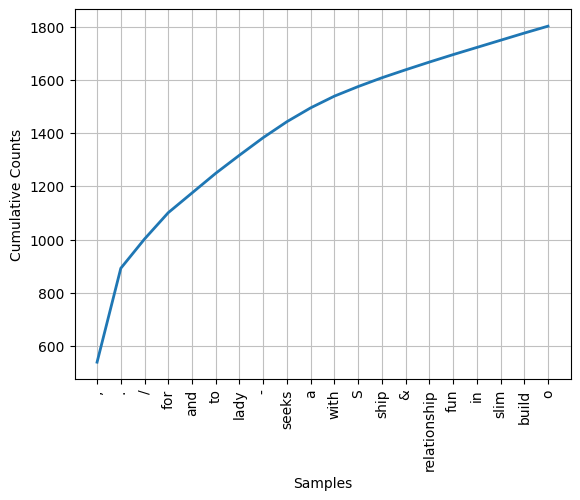

In [42]:
fdist.plot(20,cumulative=True)

Hemos visto que el token más común es ',', seguido de '.' debido a que no hemos preprocesado los datos (eliminación de stopwords, ...).

## 4.Extracción de textos a través de BeautifulSoup

La librería BeautifulSoup tiene unas potentes funciones para el tratamiento de textos.  Vamos usarla para limpiar el texto descargado desde una web.

In [43]:
import nltk
import urllib.request

In [44]:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
print (html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="icon" type="image/svg+xml" sizes="any" href="https://www.php.net/favicon.svg?v=2">\n <link rel="icon" type="image/png" sizes="196x196" href="https://www.php.net/favicon-196x196.png?v=2">\n <link rel="icon" type="image/png" sizes="32x32" href="https://www.php.net/favicon-32x32.png?v=2">\n <link rel="icon" type="image/png" sizes="16x16" href="https://www.php.net/favicon-16x16.png?v=2">\n <link rel="shortcut icon" href="https://www.php.net/favicon.ico?v=2">\n\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type=

El resultado contiene muchas etiquetas HTML que deben limpiarse.  En este caso usaremos BeautifulSoup

In [45]:
#pip install bs4

In [46]:
from bs4 import BeautifulSoup
import urllib.request

response = urllib.request.urlopen('http://php.net/')
html = response.read()
#soup = BeautifulSoup(html,"html5lib")
soup = BeautifulSoup(html,"html.parser") 

text = soup.get_text(strip=True)

print(text)

PHP: Hypertext PreprocessorDownloadsDocumentationGet InvolvedHelpSearch docsGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesEnumerationsErrorsExceptionsFibersGeneratorsAttributesReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces and ClassesPredefined AttributesContext options and parametersSupported Protocols and WrappersSecurityIntroductionGeneral considerationsInstalled as CGI binaryInstalled as an Apache moduleSession SecurityFilesystem SecurityDatabase SecurityError ReportingUser Submitted DataHiding PHPKeeping CurrentFeaturesHTTP authentication with PHPCookiesSessionsHandling file uploadsUsing remote filesConnection handlingPersistent Database ConnectionsCommand line usageGarbage CollectionDTrace Dynamic TracingFunction ReferenceAffecting PHP's BehaviourAudio Formats ManipulationAuthentication ServicesCommand Line Specific Ext

Hemos eliminado a través de BeautifulSoup aquellas referencias html del texto.  Seguimos.  Extraemos los tokens del texto.

In [47]:
tokens = [t for t in text.split()]
tokens [1:20]

['Hypertext',
 'PreprocessorDownloadsDocumentationGet',
 'InvolvedHelpSearch',
 'docsGetting',
 'StartedIntroductionA',
 'simple',
 'tutorialLanguage',
 'ReferenceBasic',
 'syntaxTypesVariablesConstantsExpressionsOperatorsControl',
 'StructuresFunctionsClasses',
 'and',
 'ObjectsNamespacesEnumerationsErrorsExceptionsFibersGeneratorsAttributesReferences',
 'ExplainedPredefined',
 'VariablesPredefined',
 'ExceptionsPredefined',
 'Interfaces',
 'and',
 'ClassesPredefined',
 'AttributesContext']

Contamos la frecuencia de palabras...

In [48]:
freq = nltk.FreqDist(tokens)

for key,val in freq.items():
    print (str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpSearch:1
docsGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
and:48
ObjectsNamespacesEnumerationsErrorsExceptionsFibersGeneratorsAttributesReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesPredefined:1
AttributesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
as:2
CGI:1
binaryInstalled:1
an:10
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUser:1
Submitted:1
DataHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
with:2
PHPCookiesSessionsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffect

¿Cuáles son los token más frecuentes?

<Axes: xlabel='Samples', ylabel='Counts'>

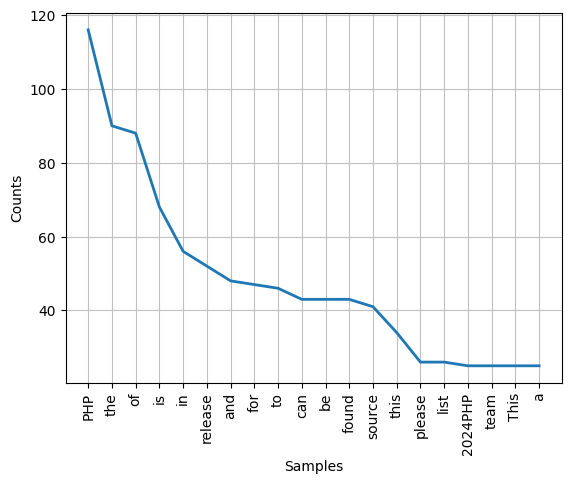

In [49]:
freq.plot(20, cumulative=False)

Eliminamos StopWords

In [50]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [51]:
from nltk.corpus import stopwords
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

Convertimos todo a minúsculas...

In [52]:
tokens = [x.lower() for x in tokens]

In [53]:
tokens_limpios = tokens[:]
sr = stopwords.words('english')
for token in tokens:
    if token in stopwords.words('english'):
        tokens_limpios.remove(token)

Extraemos los tokens más habituales...

In [54]:
freq = nltk.FreqDist(tokens_limpios)
for key,val in freq.items():
    print (str(key) + ':' + str(val))

php::1
hypertext:1
preprocessordownloadsdocumentationget:1
involvedhelpsearch:1
docsgetting:1
startedintroductiona:1
simple:1
tutoriallanguage:1
referencebasic:1
syntaxtypesvariablesconstantsexpressionsoperatorscontrol:1
structuresfunctionsclasses:1
objectsnamespacesenumerationserrorsexceptionsfibersgeneratorsattributesreferences:1
explainedpredefined:1
variablespredefined:1
exceptionspredefined:1
interfaces:1
classespredefined:1
attributescontext:1
options:1
parameterssupported:1
protocols:1
wrapperssecurityintroductiongeneral:1
considerationsinstalled:1
cgi:1
binaryinstalled:1
apache:1
modulesession:1
securityfilesystem:1
securitydatabase:1
securityerror:1
reportinguser:1
submitted:1
datahiding:1
phpkeeping:1
currentfeatureshttp:1
authentication:1
phpcookiessessionshandling:1
file:1
uploadsusing:1
remote:1
filesconnection:1
handlingpersistent:1
database:1
connectionscommand:1
line:2
usagegarbage:1
collectiondtrace:1
dynamic:1
tracingfunction:1
referenceaffecting:1
php's:1
behaviourau

<Axes: xlabel='Samples', ylabel='Counts'>

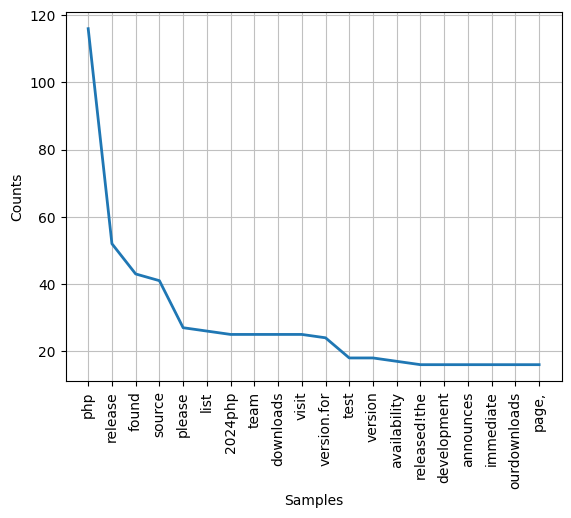

In [55]:
freq.plot(20,cumulative=False)

## 5.Leer pdfs, docs y txt con Python y generar un corpus

Es necesario instalar para este caso, la librería PyPDF2 y la librería word

In [56]:
#pip install docx2python

In [57]:
#pip install PyPDF2
## pip install word
## pip install pdfminer.six

In [58]:
#pip install pdfminer

Importamos las clases que nos permiten leer pdf y docs

In [1]:
import os
#import PyPDF2
import pdfminer as pdfm
from docx2python import docx2python
#from PyPDF2 import PdfFileReader
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

Generamos una función que nos devuelva el contenido de texto de un fichero de texto.

In [46]:
def obtener_texto(nombre_txt):
    archivo = open (nombre_txt, 'rb') # apertura del fichero en modo binario
    return archivo.read()
ruta = %pwd

In [47]:
ruta

'/home/mydoctor/Documents/03.Trabajos/01.C2B/25.Deep Learning - C2B (20h)/scripts'

In [48]:
txt1 = obtener_texto(ruta + '/datos/reading/ejemplo_feed.txt')

In [49]:
txt1

b'Five months.\n\nThat\'s how long it\'s been since Mass Effect: Andromeda launched, and that\'s how long it took BioWare Montreal to admit that nothing more can be done with the ailing game\'s story mode. Technically, it wasn\'t even a full five months, as Andromeda launched on March 21.\n\nSEE ALSO: \'Mass Effect: Andromeda\' reviews are in: Bad game is bad\n\nBioWare confirmed the decision in an update on the Mass Effect website. The Andromeda corner of the game\'s universe won\'t be tossed, but continuing stories will be relegated to special multiplayer missions and other forms of media.\n\n"Our last update, 1.10, was the final update for Mass Effect: Andromeda," the note reads. "There are no planned future patches for single-player or in-game story content."'

In [50]:
from io import StringIO

from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser

output_string = StringIO()
with open(ruta +'/datos/reading/ejemplo-una-linea.pdf', 'rb') as in_file:
    parser = PDFParser(in_file)
    doc = PDFDocument(parser)
    rsrcmgr = PDFResourceManager()
    device = TextConverter(rsrcmgr, output_string, laparams=LAParams())
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    for page in PDFPage.create_pages(doc):
        interpreter.process_page(page)

txt2 = output_string.getvalue()

In [51]:
txt2

'Ejemplo de documento PDF.  Contiene textos en negrita , en cursiva and texto subrayado\n .   \nAdemás incluye una línea de texto con estilo Título\n\n \n\nTítulo del documento.\n\nÉste es el tercer párrafo.\n\n\x0c'

In [52]:
# Ejecutar sólo en linux/mac
txt2 = txt2 [:-4]

In [53]:
txt2

'Ejemplo de documento PDF.  Contiene textos en negrita , en cursiva and texto subrayado\n .   \nAdemás incluye una línea de texto con estilo Título\n\n \n\nTítulo del documento.\n\nÉste es el tercer párrafo'

In [67]:
txt3 = docx2python(ruta + '/datos/reading/ejemplo-una-linea.docx')
txt3.body

[[[['\t\tEjemplo de documento PDF.',
    '\t\tContiene textos en negrita , en cursiva and texto subrayado.',
    '\t\t',
    '\t\tAdemás incluye una línea de texto con estilo Título',
    'Título del documento.',
    'Éste es el FINAL del documento.']]]]

In [71]:
txt3=txt3.body[0][0][0][0]

In [51]:
txt3

'\t\tEjemplo de documento PDF.'

Guardamos el resultado en nuestro equipo en una carpeta llamada _micorpus_.

In [72]:
nuevocorpus = 'micorpus/'
if not os.path.isdir(nuevocorpus): # existe nuevocorpus?
    os.mkdir(nuevocorpus)

Guardamos los 3 ficheros cargados previamente.

In [73]:
files = [txt1,txt2,txt3]  # Generación array con objetos a usar en la iteración.
files

[b'Five months.\n\nThat\'s how long it\'s been since Mass Effect: Andromeda launched, and that\'s how long it took BioWare Montreal to admit that nothing more can be done with the ailing game\'s story mode. Technically, it wasn\'t even a full five months, as Andromeda launched on March 21.\n\nSEE ALSO: \'Mass Effect: Andromeda\' reviews are in: Bad game is bad\n\nBioWare confirmed the decision in an update on the Mass Effect website. The Andromeda corner of the game\'s universe won\'t be tossed, but continuing stories will be relegated to special multiplayer missions and other forms of media.\n\n"Our last update, 1.10, was the final update for Mass Effect: Andromeda," the note reads. "There are no planned future patches for single-player or in-game story content."',
 'Ejemplo de documento PDF.  Contiene textos en negrita , en cursiva and texto subrayado\n .   \nAdemás incluye una línea de texto con estilo Título\n\n \n\nTítulo del documento.\n\nÉste es el tercer párrafo',
 '\t\tEjemplo

In [74]:
for idx, f in enumerate(files):  
    with open(nuevocorpus+str(idx)+'.txt', 'w') as fileout:
        fileout.write(str(f))

Generamos el corpus.  Aquí se identifican internamente los párrafos, sentencias, palabras, ...

In [79]:
corpus = PlaintextCorpusReader (ruta +'/datos/reading/', '.*')

In [80]:
print (corpus.words())

['<!', 'DOCTYPE', 'HTML', 'PUBLIC', '"-//', 'W3C', ...]


Para poder extraer las sentencias del corpus, necesitamos instalar un paquete...

In [60]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/egoitzaulestiapadilla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
corpus.fileids()[0]

'ejemplo-html.html'

In [82]:
print(corpus.paras(corpus.fileids()[0]))

[[['<!', 'DOCTYPE', 'HTML', 'PUBLIC', '"-//', 'W3C', '//', 'DTD', 'HTML', '4', '.', '01', 'Transitional', '//', 'EN', '">', '<', 'html', '>', '<', 'head', '>', '<', 'title', '>', 'Sample', 'Web', 'Page', '</', 'title', '>', '<', 'META', 'http', '-', 'equiv', '="', 'Content', '-', 'Type', '"', 'content', '="', 'text', '/', 'html', ';', 'charset', '=', 'iso', '-', '8859', '-', '1', '">', '</', 'head', '>', '<', 'body', 'bgcolor', '="#', 'ffffff', '"', 'text', '="#', '000000', '">', '<', 'h1', 'class', '=', "'", 'header', "'>", 'Main', 'heading', '</', 'h1', '>', '<', 'p', '>', 'This', 'is', 'a', 'very', 'simple', 'HTML', 'document', '</', 'p', '>', '<', 'p', '>', 'Improve', 'your', 'image', 'by', 'including', 'an', 'image', '.'], ['</', 'p', '>', '<', 'img', 'src', '="', 'http', '://', 'www', '.', 'mygifs', '.', 'com', '/', 'CoverImage', '.', 'gif', '"', 'alt', '="', 'A', 'Great', 'HTML', 'Resource', '">', '<', 'p', 'class', "='", 'link', "'>", 'Add', 'a', 'link', 'to', 'your', 'favorite

## 6. Tokenizar textos que no están en inglés.

In [65]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/egoitzaulestiapadilla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktTrainer
import nltk.data

print(nltk.data.find("tokenizers/punkt"))


/Users/egoitzaulestiapadilla/nltk_data/tokenizers/punkt


In [63]:
import nltk.data
print(nltk.data.find("tokenizers/punkt"))


/Users/egoitzaulestiapadilla/nltk_data/tokenizers/punkt


In [67]:
from nltk.tokenize import sent_tokenize

texto = "Bonjour M. Adam, comment allez-vous? J'espère que tout va bien. Aujourd'hui est un bon jour."
print(sent_tokenize(texto, "french"))


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/french/[0m

  Searched in:
    - '/Users/egoitzaulestiapadilla/nltk_data'
    - '/Users/egoitzaulestiapadilla/opt/anaconda3/nltk_data'
    - '/Users/egoitzaulestiapadilla/opt/anaconda3/share/nltk_data'
    - '/Users/egoitzaulestiapadilla/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [61]:
from nltk.tokenize import sent_tokenize
texto = "Bonjour M. Adam, comment allez-vous? J'espère que tout va bien. Aujourd'hui est un bon jour."

print(sent_tokenize(texto,"french"))

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/french/[0m

  Searched in:
    - '/Users/egoitzaulestiapadilla/nltk_data'
    - '/Users/egoitzaulestiapadilla/opt/anaconda3/nltk_data'
    - '/Users/egoitzaulestiapadilla/opt/anaconda3/share/nltk_data'
    - '/Users/egoitzaulestiapadilla/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


# 7. Obtención de sinónimos (Wordnet)

In [68]:
from nltk.corpus import wordnet

syn = wordnet.synsets("happy")
print(syn[0].definition())
print(syn[0].examples())

enjoying or showing or marked by joy or pleasure
['a happy smile', 'spent many happy days on the beach', 'a happy marriage']


In [69]:
syn

[Synset('happy.a.01'),
 Synset('felicitous.s.02'),
 Synset('glad.s.02'),
 Synset('happy.s.04')]

In [70]:
syn = wordnet.synsets("python")
print(syn[0].definition())
print(syn[0].examples())

large Old World boas
[]


In [71]:
syn

[Synset('python.n.01'), Synset('python.n.02'), Synset('python.n.03')]

In [72]:
sinonimos = []

for syn in wordnet.synsets('happy'):
    for lemma in syn.lemmas():
        sinonimos.append(lemma.name())

print(sinonimos)

# Eliminamos duplicados
print([*set(sinonimos)])

['happy', 'felicitous', 'happy', 'glad', 'happy', 'happy', 'well-chosen']
['felicitous', 'happy', 'glad', 'well-chosen']


# 8. Extracción de lemas usando Wordnet

In [76]:
from nltk.stem import WordNetLemmatizer

lema = WordNetLemmatizer()
print(lema.lemmatize('increases'))

increase


Puede suceder que una misma palabra sea un sustantivo o verbo en función del contexto.  Podemos indicarle al lematizador, que nos devuelva el lema para una palabra que sea un verbo.

In [77]:
print(lema.lemmatize('playing', pos="v"))

play


¿Y si le pedimos que nos devuelva los lemas en función de los diferentes contextos?...

In [78]:
print(lema.lemmatize('playing', pos="v")) # verbos
print(lema.lemmatize('playing', pos="n")) # sustantivos
print(lema.lemmatize('playing', pos="a")) # adjetivos

play
playing
playing


# 9. Extracción de steems para otro idioma distinto al inglés.

In [79]:
from nltk.stem import SnowballStemmer
print(SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


In [89]:
castellano = SnowballStemmer('english')
print(castellano.stem("palabrita"))

palabrita


No ha funcionado.

In [90]:
castellano = SnowballStemmer('spanish')
print(castellano.stem("palabrite"))

palabrit


# 10. Extracción de steems (formas canónicas) y lemas

In [91]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

steams = PorterStemmer()
lemas = WordNetLemmatizer()

print(steams.stem('stones'))
print(steams.stem('speaking'))
print(steams.stem('bedroom'))
print(steams.stem('jokes'))
print(steams.stem('lisa'))
print(steams.stem('purple'))
print('----------------------')
print(lemas.lemmatize('stones'))
print(lemas.lemmatize('speaking'))
print(lemas.lemmatize('bedroom'))
print(lemas.lemmatize('jokes'))
print(lemas.lemmatize('lisa'))
print(lemas.lemmatize('purple'))

stone
speak
bedroom
joke
lisa
purpl
----------------------
stone
speaking
bedroom
joke
lisa
purple
